
# <center>**Linear Regression From Scratch**</center>

## Introduction

Linear Regression is one of the foundational algorithms in Machine Learning and Statistics. 
It models the relationship between a dependent variable (target) and one or more independent variables (features) by fitting a linear equation.

In this notebook, we implement Linear Regression from scratch.

---


## Theory: Cost Function and Gradient Descent

**1. Cost Function (Mean Squared Error - MSE):**

We define the cost function $J(w, b)$ as:
$$ J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})^2 $$
Where:
- $ m $ is the number of training examples
- $ \hat{y}^{(i)} = w \cdot x^{(i)} + b $ is the predicted value
- $ y^{(i)} $ is the true value

**2. Gradient Descent Update Rules:**

To minimize the cost function, we update parameters $w$ and $b$ using:

$$ w := w - \alpha \frac{\partial J(w, b)}{\partial w} $$

$$ b := b - \alpha \frac{\partial J(w, b)}{\partial b} $$

Where:
- $ \alpha $ is the learning rate which controls the step size of each update
- Gradients are calculated as:

$$ \frac{\partial J(w, b)}{\partial w} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)}) \cdot x^{(i)} $$

$$ \frac{\partial J(w, b)}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)}) $$

---


## Implementation from scratch

In [9]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
class LinearRegressionScratch:

    def __init__(self, learning_rate=0.01, n_iterations=10000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    def fit(self, X, y):
        self.n, self.m = X.shape # self.m is the number of features, self.n is the number of samples
        self.w = np.zeros(self.m)
        self.b = 0
        self.X = X
        self.y = y
        self.losses = []

        for i in range(self.n_iterations):
            self.update_params()
            self.update_params()
            loss = self.compute_loss()
            self.losses.append(loss)  # Record the loss

        return self
    
    def update_params(self):
        y_pred = self.predict(self.X)

        # compute gradients
        dw = (1/self.n) * np.dot(self.X.T, (y_pred - self.y))
        db = (1/self.n) * np.sum(y_pred - self.y)

        # update parameters
        self.w -= self.learning_rate * dw
        self.b -= self.learning_rate * db

        return self, dw, db
    
    def compute_loss(self):
        y_pred = self.predict(self.X)
        loss = (1/(2*self.n)) * np.sum((y_pred - self.y) ** 2)
        return loss

    def predict(self, X):
        return np.dot(X, self.w) + self.b


----
## Apply it to real dataset

📊 Data: Auto MPG Dataset

🎯 Goal: Predict a car’s fuel efficiency (mpg) using engine and car specs.

🔗 Source: Available in seaborn or directly via UCI ML repo.

In [3]:
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
# import data
data = sns.load_dataset("mpg").dropna()
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
# use one feature and one target variable
df = data[["horsepower", "mpg"]]
df.head()

,horsepower,mpg
0,130.0,18.0
1,165.0,15.0
2,150.0,18.0
3,150.0,16.0
4,140.0,17.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   horsepower  392 non-null    float64
 1   mpg         392 non-null    float64
dtypes: float64(2)
memory usage: 9.2 KB


In [7]:
# define X and y
X = df[["horsepower"]].values.reshape(-1, 1) # It reshapes a 1D array into a 2D column vector
y = df["mpg"]

In [10]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

n = X_train.shape[0]
m = X_train.shape[1]

In [12]:
# create an instance of the VickLinearRegression class
model = LinearRegressionScratch(learning_rate=0.01, n_iterations=1000)

# fit the model to the training data
model.fit(X_train, y_train)

# make predictions on the test data
y_pred = model.predict(X_test)

print("Predictions: ", np.round(y_pred[:3], 2))
print("True values: ", y_test[:3])
print("Trained w: ", round(model.w[0], 2))
print("Trained b: ", round(model.b, 2))

Predictions:  [29.39 21.91 30.85]
True values:  79     26.0
276    21.6
248    36.1
Name: mpg, dtype: float64
Trained w:  -6.21
Trained b:  23.6


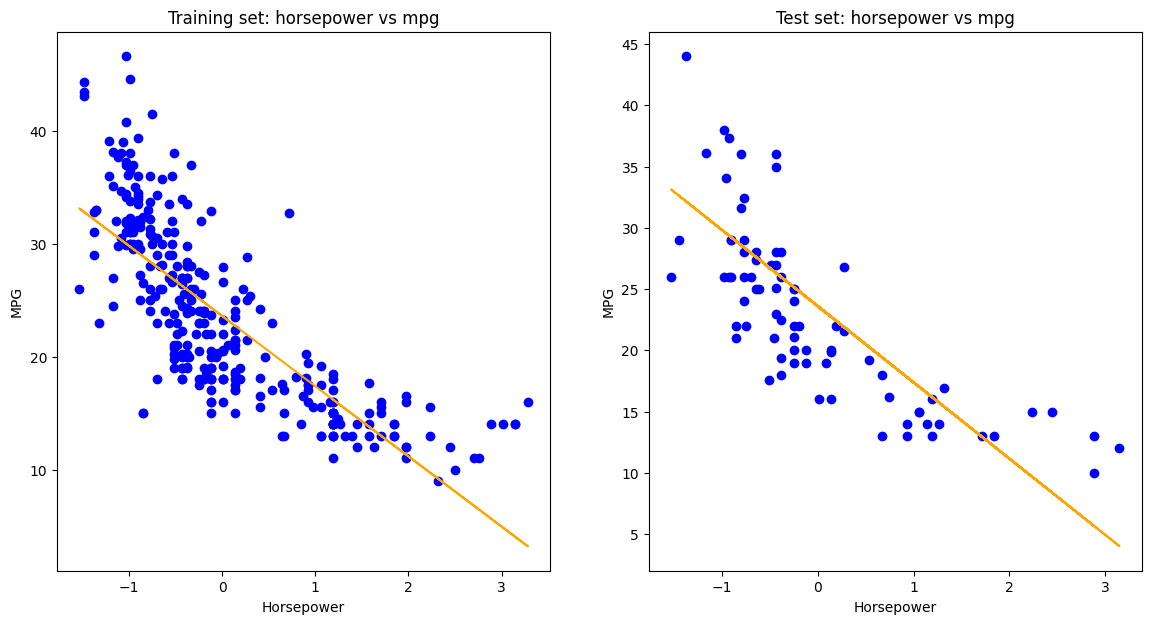

In [16]:
# Visualization on training set
fig, ax = plt.subplots(1, 2, figsize=(14, 7))
ax.flatten()
ax[0].scatter(X_train, y_train, color = 'blue')
ax[0].plot(X_train, model.predict(X_train), color = 'orange')
ax[0].set_title('Training set: horsepower vs mpg')
ax[0].set_xlabel('Horsepower')
ax[0].set_ylabel('MPG')

# Visualization on test sete
ax[1].scatter(X_test, y_test, color = 'blue')
ax[1].plot(X_test, y_pred, color = 'orange')
ax[1].set_title('Test set: horsepower vs mpg')

ax[1].set_xlabel('Horsepower')
ax[1].set_ylabel('MPG')

plt.show()

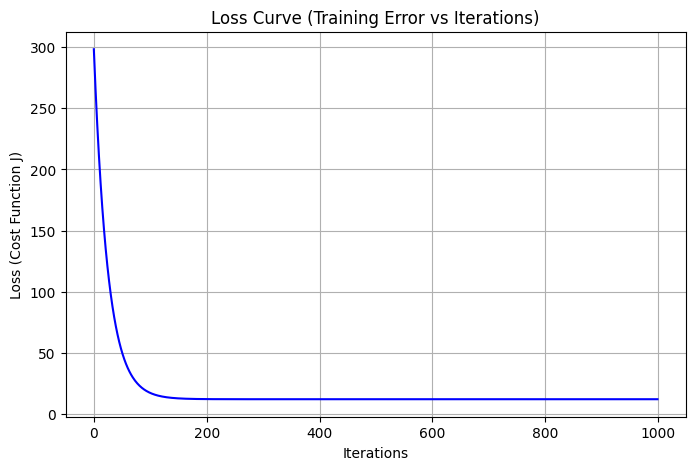

In [14]:
# Plot the loss curve
plt.figure(figsize=(8,5))
plt.plot(range(model.n_iterations), model.losses, color='blue')
plt.title("Loss Curve (Training Error vs Iterations)")
plt.xlabel("Iterations")
plt.ylabel("Loss (Cost Function J)")
plt.grid(True)
plt.show()

---
## Implement Linear Regression Using sklearn

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [48]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

print("Predictions: ", np.round(y_pred[:3], 2))
print("True values: ", y_test[:3].values)


Predictions:  [29.39 21.91 30.85]
True values:  [26.  21.6 36.1]


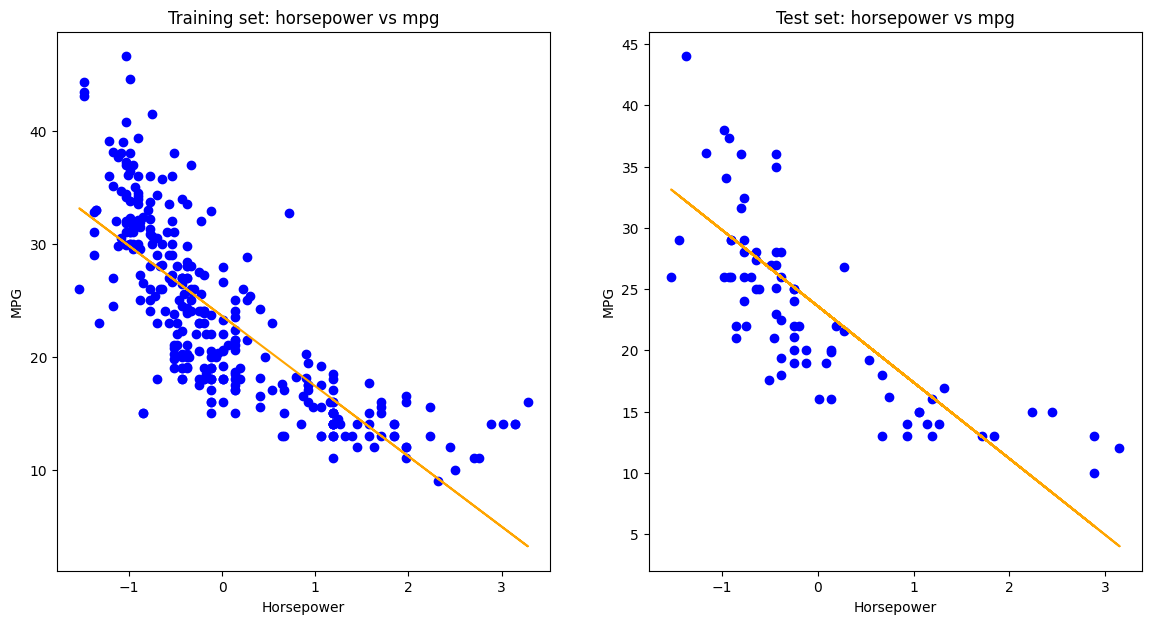

In [49]:
# Visualization on training set
fig, ax = plt.subplots(1, 2, figsize=(14, 7))
ax.flatten()
ax[0].scatter(X_train, y_train, color = 'blue')
ax[0].plot(X_train, lr_model.predict(X_train), color = 'orange')
ax[0].set_title('Training set: horsepower vs mpg')
ax[0].set_xlabel('Horsepower')
ax[0].set_ylabel('MPG')

# Visualization on test sete
ax[1].scatter(X_test, y_test, color = 'blue')
ax[1].plot(X_test, y_pred, color = 'orange')
ax[1].set_title('Test set: horsepower vs mpg')

ax[1].set_xlabel('Horsepower')
ax[1].set_ylabel('MPG')

plt.show()

In [20]:
sklearn_mse = mean_squared_error(y_test, y_pred)

print("Sklearn MSE: ", sklearn_mse)
print("Custom MSE: ", model.compute_loss())

Sklearn MSE:  22.153237026837985
Custom MSE:  12.23758413684173


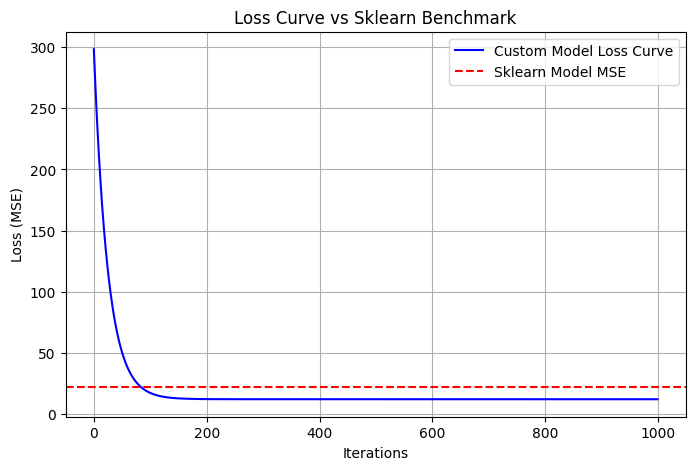

In [22]:
plt.figure(figsize=(8,5))
plt.plot(range(model.n_iterations), model.losses, color='blue', label="Custom Model Loss Curve")
plt.axhline(y=sklearn_mse, color='red', linestyle='--', label="Sklearn Model MSE")
plt.title("Loss Curve vs Sklearn Benchmark")
plt.xlabel("Iterations")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.grid(True)
plt.show()

The custom model’s loss converges very close to the Sklearn benchmark, validating that the scratch implementation is both correct and efficient.
This demonstrates that gradient descent is correctly minimizing the cost function and reaching optimal parameters over time.


## Final Insights and Learnings

- **Learning Rate Tuning:** Small learning rates lead to slow convergence; large ones can cause divergence.
- **Importance of Normalization:** Feature scaling helps when inputs are on very different scales.
- **Visualization Matters:** Plotting the loss curve helps diagnose training issues quickly.
- **Hands-On Coding Deepens Understanding:** Implementing algorithms manually clarifies theoretical concepts that are often overlooked when using libraries.

---